# 차원 축소


## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

from sklearn.datasets import load_breast_cancer, load_digits, load_iris, make_swiss_roll
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

## **2. 고차원 데이터 차원축소**
종양 진단 데이터

### (1) 데이터 준비

#### 1) 데이터 로딩

In [ ]:
# breast_cancer 데이터 로딩
cancer=load_breast_cancer()
x = cancer.data
y = cancer.target

x = pd.DataFrame(x, columns=cancer.feature_names)

x.shape

(569, 30)

In [ ]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2) 스케일링
* 거리계산 기반 차원축소이므로 스케일링 필요

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# (옵션)데이터프레임 변환
x = pd.DataFrame(x, columns=cancer.feature_names)

#### 3) 데이터 분할

* train, validation 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (2) 주성분 만들기

In [ ]:
# feature 수
x_train.shape[1]

30

* 주 성분 분석 수행

In [ ]:
# 주성분을 몇개로 할지 결정(최대값 : 전체 feature 수)
n = x_train.shape[1]

# 주성분 분석 선언
pca = PCA(n_components=n)

# 만들고, 적용하기
x_train_pc = pca.fit_transform(x_train)
x_val_pc = pca.transform(x_val)

* 편리하게 사용하기 위해 데이터프레임으로 변환

In [ ]:
# 칼럼이름 생성
column_names = [ 'PC'+str(i+1) for i in range(n) ]
column_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [ ]:
# 데이터프레임으로 변환하기
x_train_pc = pd.DataFrame(x_train_pc, columns = column_names)
x_val_pc = pd.DataFrame(x_val_pc, columns = column_names)
x_train_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.215422,0.112002,0.208768,-0.293000,0.032626,-0.135166,0.022526,-0.032558,0.047827,0.000123,...,-0.007350,-0.017951,-0.000020,0.012561,0.031249,0.012504,0.006305,0.001172,-0.003217,0.000551
1,0.869455,0.174561,0.277555,-0.177606,-0.142633,-0.032379,-0.224845,0.131471,0.013562,-0.096306,...,-0.025857,0.048748,0.020773,0.025104,0.016937,0.002102,0.002214,-0.018053,-0.000338,-0.003576
2,-0.298314,0.259637,-0.090626,0.118568,0.017034,0.139689,0.001580,0.037095,-0.016287,-0.022811,...,-0.006720,0.010245,0.004547,-0.001281,0.000354,-0.006817,-0.026928,-0.002939,0.000047,-0.001251
3,0.862285,0.165837,-0.061614,0.199085,-0.347577,-0.180729,-0.228333,-0.067238,-0.069730,-0.117260,...,0.009059,-0.030910,0.035322,0.034549,-0.005578,-0.043975,-0.007471,0.015473,0.000706,-0.005161
4,-0.229030,0.149323,0.483832,0.331190,0.096083,-0.016467,0.082057,0.026775,0.036597,0.092378,...,0.025143,-0.003776,0.006688,-0.003650,-0.001208,0.003156,0.004520,0.002689,-0.002969,0.000483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.741352,-0.388231,-0.040183,0.074092,0.068445,0.075507,-0.024218,0.060493,-0.133940,-0.101752,...,-0.002090,-0.000484,0.014230,-0.002124,-0.014765,0.006670,0.007923,0.001255,-0.003604,0.000919
394,0.336910,0.050769,0.187677,-0.248374,0.064661,0.098182,-0.056833,0.054760,0.031554,-0.014357,...,-0.027861,0.022020,-0.005405,0.029800,0.020979,0.004420,0.005289,-0.011093,-0.009150,-0.001309
395,-0.467700,0.063227,-0.217000,-0.247931,0.060940,-0.031664,0.024826,-0.024798,-0.032136,-0.003169,...,0.006566,0.004962,0.016222,-0.007670,-0.002116,-0.000877,0.000649,-0.000592,-0.000092,0.000031
396,-0.320752,0.297598,-0.063923,-0.290258,-0.132390,-0.028911,-0.168774,-0.034643,-0.047127,-0.012575,...,-0.015170,0.017832,-0.002366,-0.012286,0.006574,0.004665,-0.001124,0.001223,-0.000861,-0.000485


### (3) 주성분 누적 분산 그래프
* 그래프를 보고 적절한 주성분의 개수를 지정(elbow method!)
* x축 : PC 수
* y축 : 전체 분산크기 - 누적 분산크기

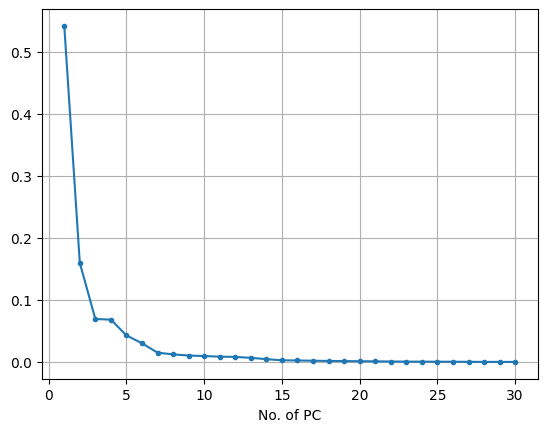

In [ ]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_, marker = '.')
plt.xlabel('No. of PC')
plt.grid()
plt.show()

### (4) 시각화
* 주 성분 중 상위 2개를 뽑아 시각화 해 봅시다.

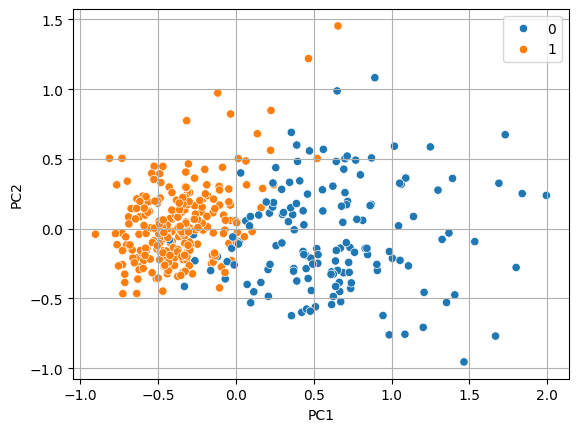

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_train_pc, hue = y_train)
plt.grid()
plt.show()

## 3.지도학습으로 연계하기

### (1) 원본데이터로 모델 생성하기
* knn 알고리즘으로 분류 모델링을 수행합니다.
* k : 기본값으로 지정

* 학습

In [ ]:
model0 = KNeighborsClassifier()
model0.fit(x_train, y_train)

KNeighborsClassifier()

* 예측 및 평가

In [ ]:
# 원본데이터 모델의 성능
pred0 = model0.predict(x_val)

print(confusion_matrix(y_val, pred0))
print(accuracy_score(y_val, pred0))
print(classification_report(y_val, pred0, digits=4))

[[ 62   2]
 [  3 104]]
0.9707602339181286
              precision    recall  f1-score   support

           0     0.9538    0.9688    0.9612        64
           1     0.9811    0.9720    0.9765       107

    accuracy                         0.9708       171
   macro avg     0.9675    0.9704    0.9689       171
weighted avg     0.9709    0.9708    0.9708       171



### (2) PCA 후 모델링
* 다음의 조건으로 모델을 만들고 성능을 확인해 봅시다.
    * 알고리즘 : KNN

#### 1) 주성분 상위 1개로 모델 만들기

In [ ]:
column_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

In [ ]:
column_names[:1]

['PC1']

In [ ]:
cols = column_names[:1]
x_train_pc1 = x_train_pc.loc[:, cols]
x_val_pc1 = x_val_pc.loc[:, cols]

In [ ]:
x_train_pc1.shape

(398, 1)

* 주성분 1개로 만든 모델 Vs. 전체 변수로 만든 모델

In [ ]:
# KNN 모델링, 주성분 1개로 모델링
model1 = KNeighborsClassifier()
model1.fit(x_train_pc1, y_train)

KNeighborsClassifier()

In [ ]:
# 원본데이터 모델의 성능
pred1 = model1.predict(x_val_pc1)

print(confusion_matrix(y_val, pred1))
print(accuracy_score(y_val, pred1))
print(classification_report(y_val, pred1))

[[58  6]
 [10 97]]
0.9064327485380117
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.94      0.91      0.92       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



#### 2) 주성분 2개로 모델링

In [ ]:
n = 2
# 데이터 준비
cols = column_names[:n]
x_train_pc_n = x_train_pc.loc[:, cols]
x_val_pc_n = x_val_pc.loc[:, cols]

# 모델링
model_n = KNeighborsClassifier()
model_n.fit(x_train_pc_n, y_train)

KNeighborsClassifier()

In [ ]:
# 예측
pred_n = model_n.predict(x_val_pc_n)

# 평가
print(confusion_matrix(y_val, pred_n))
print(accuracy_score(y_val, pred_n))
print(classification_report(y_val, pred_n))

[[ 63   1]
 [  5 102]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.99      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



#### 3) 주성분 개수를 1~30개까지 늘려가면서 실험

In [ ]:
result_acc = []  # 빈 리스트 생성

for n in range(1,31):
    # 데이터 준비
    cols = column_names[:n]
    x_train_pc_n = x_train_pc.loc[:, cols]
    x_val_pc_n = x_val_pc.loc[:, cols]

    # 모델링
    model_n = KNeighborsClassifier()
    model_n.fit(x_train_pc_n, y_train)

    # 예측
    pred_n = model_n.predict(x_val_pc_n)

    result_acc.append(accuracy_score(y_val, pred_n))

In [ ]:
result_acc

[0.9064327485380117,
 0.9649122807017544,
 0.9532163742690059,
 0.9532163742690059,
 0.9590643274853801,
 0.9766081871345029,
 0.9766081871345029,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9766081871345029,
 0.9707602339181286,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286]

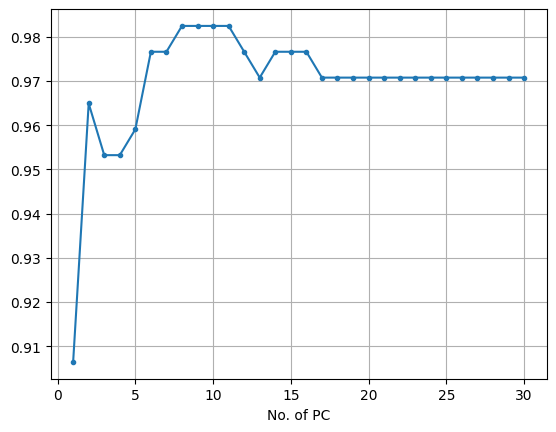

In [ ]:
plt.plot(range(1,31), result_acc, marker = '.')
plt.xlabel('No. of PC')
plt.grid()

## **4. t-SNE**

### (1) 주제1 : 종양 진단 데이터

#### 1) 학습(차원축소)

In [ ]:
from sklearn.manifold import TSNE # 후속작업:시각화

In [ ]:
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 사용의 편리함을 위해 DataFrame으로 변환
x_tsne = pd.DataFrame(x_tsne, columns = ['T1','T2'])

In [ ]:
x_tsne.shape

(569, 2)

#### 2) 시각화

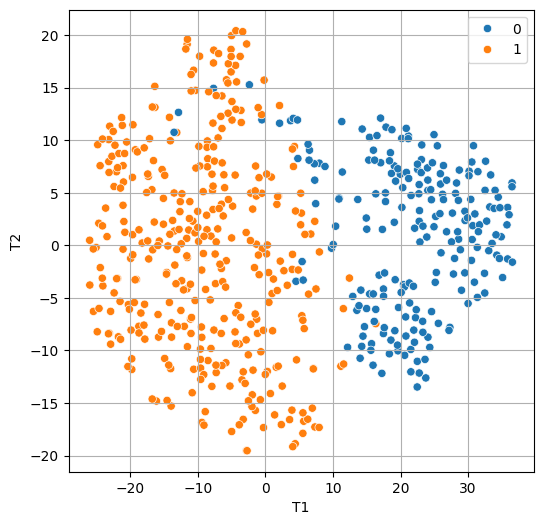

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()

### (2) MNIST(슬림 버전)

#### 1) 데이터 준비

* 샘플데이터 로딩

In [ ]:
digits = load_digits()
x = digits.data
y = digits.target

y = pd.Categorical(y)  # 0~9 숫자를 범주형으로 명시적으로 지정

In [ ]:
x.shape

(1797, 64)

* 둘러보기

In [ ]:
print(x[0].reshape(8,8))  # 8*8 픽셀 수로 reshape

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
# 최대, 최소값
np.min(x), np.max(x)

(np.float64(0.0), np.float64(16.0))

위에 출력한 값은 8*8로 픽셀값을 표시한건데,
원래 픽셀은 0-256인데 여긴 0-16로 표시

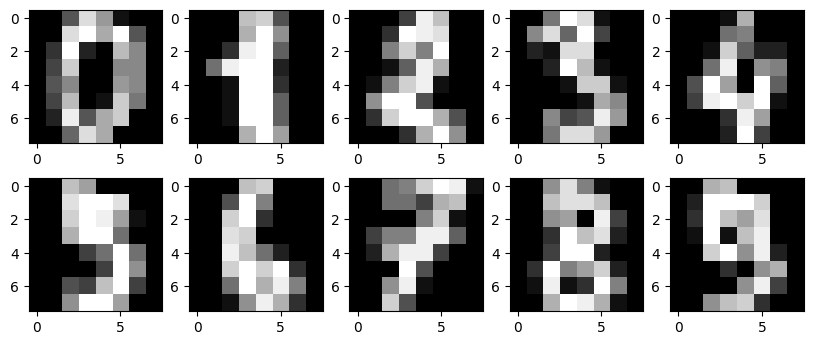

In [ ]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap='gray');

* 스케일링

In [ ]:
# 최대, 최소값
np.min(x), np.max(x)

(np.float64(0.0), np.float64(16.0))

In [ ]:
# 최대값으로 나누면 Min Max 스케일링이 됩니다.
x = x / 16

#### 2) PCA
* 주성분 2개로 차원을 축소하고
* 시각화 합니다.

In [ ]:
# 차원 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# 데이터프레임으로 변환(옵션)
x_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])

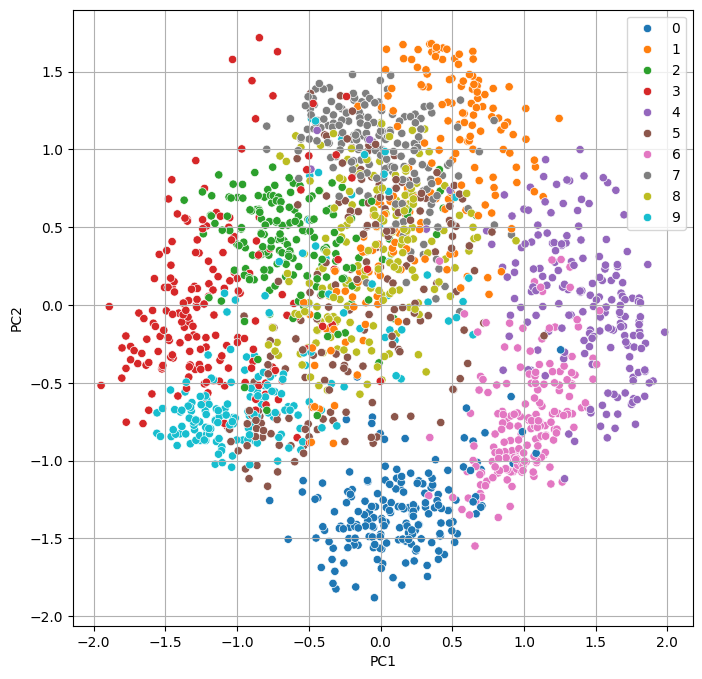

In [ ]:
# 시각화
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_pca, hue = y)
plt.grid()
plt.show()

#### 3) tSNE
* 2차원으로 축소하고
* 시각화 합니다.

In [ ]:
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 데이터프레임으로 변환(옵션)
x_tsne = pd.DataFrame(x_tsne, columns = ['T1', 'T2'])

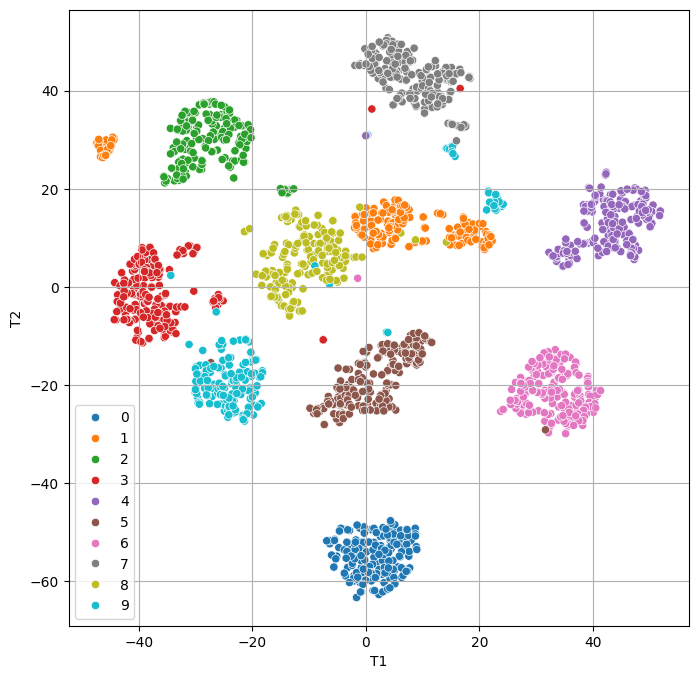

In [ ]:
# 시각화
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()
plt.show()

## 5.복습
오늘 수업 복습은, 별도 문제가 주어지지 않고,
배운 내용을 다시 살펴보고 코드를 실행해보면서 직접 Review하는 것입니다.^^